### 인공신경망

>* install.packages("nnet")

In [1]:
install.packages("nnet")

package 'nnet' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'nnet'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\nnet\CITATION를 C:\ProgramData\Anaconda3\Lib\R\library\nnet\CITATION로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\nnet\DESCRIPTION를 C:\ProgramData\Anaconda3\Lib\R\library\nnet\DESCRIPTION로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\nnet\help\aliases.rds를 C:\ProgramData\Anaconda3\Lib\R\library\nnet\help\aliases.rds로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\ProgramData\Anaconda3\Lib\R\library\00LOCK\nnet\help\AnIndex를 C:\ProgramData\Anaconda3\Lib\R\library\nnet\help\AnIndex로 복사하는데 문제가 발생했습니다: Permission denied"Warning message in file.copy(savedcop


The downloaded binary packages are in
	C:\Users\TJOEUN-JR\AppData\Local\Temp\Rtmp2NvXey\downloaded_packages


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

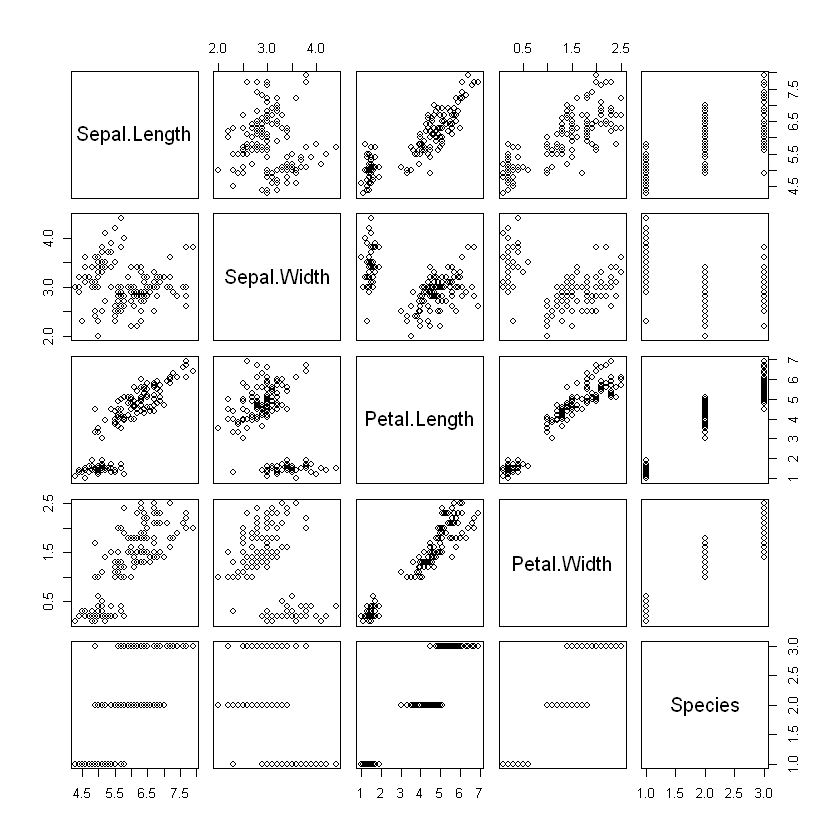

In [2]:
?iris
head(iris)
summary(iris)
plot(iris)

In [6]:
# 품종컬럼을 제외한 수치값들을 표준화
# scale : 표준화함수
?scale
iris.scaled <- cbind(scale(iris[-5]), iris[5]) # iris[-5] 품종컬럼을 제외
head(iris.scaled)
summary(iris.scaled)

# 표준편차
apply(iris.scaled[-5], 2, sd)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
-0.8976739,1.01560199,-1.335752,-1.311052,setosa
-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
-1.3807271,0.32731751,-1.392399,-1.311052,setosa
-1.5014904,0.09788935,-1.279104,-1.311052,setosa
-1.0184372,1.24503015,-1.335752,-1.311052,setosa
-0.5353840,1.93331463,-1.165809,-1.048667,setosa


  Sepal.Length       Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.86378   Min.   :-2.4258   Min.   :-1.5623   Min.   :-1.4422  
 1st Qu.:-0.89767   1st Qu.:-0.5904   1st Qu.:-1.2225   1st Qu.:-1.1799  
 Median :-0.05233   Median :-0.1315   Median : 0.3354   Median : 0.1321  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.67225   3rd Qu.: 0.5567   3rd Qu.: 0.7602   3rd Qu.: 0.7880  
 Max.   : 2.48370   Max.   : 3.0805   Max.   : 1.7799   Max.   : 1.7064  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1

In [7]:
# random seed 설정
set.seed(1234)

samp <- c(sample(1:50,35), sample(51:100,35), sample(101:150,35))
samp

# 학습용데이터셋
data.train <- iris.scaled[samp, ]
# 검증용데이타셋
data.test <- iris.scaled[-samp, ]

[1]  28  16  22  37  44   9   5  38  49   4  34  39  48  26   6  15  14  40
 [19]  30  24  32  41  29  21   8  20  31   3  50  46   2  35  47  42  12  53
 [37]  73  91  86  58  82  92  93  52  65  88  56  79  95  96  76  67  97  60
 [55]  98  72 100  59  66  90  80  87  99  75  63  85  69  68  89  62 120 141
 [73] 107 132 106 137 127 112 108 101 136 128 119 109 130 117 122 146 121 147
 [91] 113 135 102 133 126 139 131 116 111 104 103 124 110 144 129

In [8]:
summary(data.train)
summary(data.test)

  Sepal.Length        Sepal.Width       Petal.Length        Petal.Width      
 Min.   :-1.863780   Min.   :-1.9670   Min.   :-1.505695   Min.   :-1.44224  
 1st Qu.:-0.897674   1st Qu.:-0.5904   1st Qu.:-1.222456   1st Qu.:-1.17986  
 Median :-0.052331   Median :-0.1315   Median : 0.307030   Median : 0.13207  
 Mean   : 0.004025   Mean   :-0.0354   Mean   :-0.005341   Mean   :-0.01287  
 3rd Qu.: 0.672249   3rd Qu.: 0.5567   3rd Qu.: 0.760212   3rd Qu.: 0.78803  
 Max.   : 2.483699   Max.   : 3.0805   Max.   : 1.779869   Max.   : 1.70638  
       Species  
 setosa    :35  
 versicolor:35  
 virginica :35  
                
                
                

  Sepal.Length        Sepal.Width        Petal.Length       Petal.Width      
 Min.   :-1.743017   Min.   :-2.42582   Min.   :-1.56234   Min.   :-1.44224  
 1st Qu.:-0.897674   1st Qu.:-0.59040   1st Qu.:-1.22246   1st Qu.:-1.17986  
 Median :-0.052331   Median : 0.09789   Median : 0.53362   Median : 0.26326  
 Mean   :-0.009393   Mean   : 0.08259   Mean   : 0.01246   Mean   : 0.03003  
 3rd Qu.: 0.793012   3rd Qu.: 0.78617   3rd Qu.: 0.76021   3rd Qu.: 0.91922  
 Max.   : 2.242172   Max.   : 2.39217   Max.   : 1.66657   Max.   : 1.70638  
       Species  
 setosa    :15  
 versicolor:15  
 virginica :15  
                
                
                

#### 실습 1. 인공신경망
>* nnet(종속변수~독립변수, data=학습용데이터, size=은닉층)

In [9]:
library(nnet)
model.nnet <- nnet(Species~., data=data.train, size=3)

# 결과분석 
# 초기값이 nnet에 의해 임의로 설정이 되어 결과마다 조금씩 다르게 나타난다.
# 가중치 : weights:  27
# 초기가중치값 : initial  value 118.176907
# 반복횟수 : iter  30 value 0.000065

# weights:  27
initial  value 124.913043 
iter  10 value 6.777899
iter  20 value 0.018147
final  value 0.000081 
converged


In [10]:
# 학습모델을 요약
summary(model.nnet)

# 학습에 따라서 가중치가 결정
# 노드갯수 : 4(입력층)-3(은닉층)-3(출력층)
# b -> h1 : h1노드로 가는 가중치 -10.38
# i1->h1  : 입력노드(i1)에서 은닉층의 노드(h1)으로 가는 가중치가 -3.73

a 4-3-3 network with 27 weights
options were - softmax modelling 
 b->h1 i1->h1 i2->h1 i3->h1 i4->h1 
 12.81  -0.78  -1.95   8.76  10.10 
 b->h2 i1->h2 i2->h2 i3->h2 i4->h2 
 27.04   2.75   0.30 -30.53 -20.33 
 b->h3 i1->h3 i2->h3 i3->h3 i4->h3 
 24.13   7.93   1.49 -22.25 -23.81 
 b->o1 h1->o1 h2->o1 h3->o1 
 -1.97 -23.62  14.90  13.52 
 b->o2 h1->o2 h2->o2 h3->o2 
 -4.39   8.26  10.38   1.51 
 b->o3 h1->o3 h2->o3 h3->o3 
  6.23  15.96 -25.54 -15.42 

In [11]:
# 신경망 모델의 변수확인
names(model.nnet)

# 가중치의 총합
model.nnet$wts 

[1] "n"             "nunits"        "nconn"         "conn"         
 [5] "nsunits"       "decay"         "entropy"       "softmax"      
 [9] "censored"      "value"         "wts"           "convergence"  
[13] "fitted.values" "residuals"     "lev"           "call"         
[17] "terms"         "coefnames"     "xlevels"

[1]  12.8107788  -0.7810215  -1.9549337   8.7552986  10.0957250  27.0383375
 [7]   2.7478793   0.3045778 -30.5348123 -20.3327654  24.1349812   7.9329718
[13]   1.4923374 -22.2536750 -23.8062848  -1.9650647 -23.6153324  14.9040204
[19]  13.5224780  -4.3872693   8.2641797  10.3759925   1.5057224   6.2348847
[25]  15.9605330 -25.5416150 -15.4244039

In [12]:
# 검증용 데이터로 예측
# predict() : type='class'은 범부형 변수일 경우 설정
predicted <- predict(model.nnet, data.test, type='class')
predicted
length(predicted) # 45개의 검증용데이터

# 예측율
actual <- data.test$Species
actual

# table() : 오분류표출력
table(actual, predicted)
mean(actual==predicted)

# 결과분석
# setosa는 100%, versicolor 15개중 13개예측, virginica 100% 예측
# 예측률 96%의 예측

[1] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
 [6] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[11] "setosa"     "setosa"     "setosa"     "setosa"     "setosa"    
[16] "versicolor" "versicolor" "versicolor" "versicolor" "versicolor"
[21] "versicolor" "versicolor" "virginica"  "versicolor" "versicolor"
[26] "virginica"  "versicolor" "versicolor" "virginica"  "versicolor"
[31] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[36] "virginica"  "virginica"  "virginica"  "virginica"  "virginica" 
[41] "virginica"  "virginica"  "virginica"  "virginica"  "virginica"

[1] 45

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] setosa     setosa     setosa     versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] versicolor versicolor versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] virginica  virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

            predicted
actual       setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         12         3
  virginica       0          0        15

[1] 0.9333333